In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

print(tf.__version__)


2.13.0


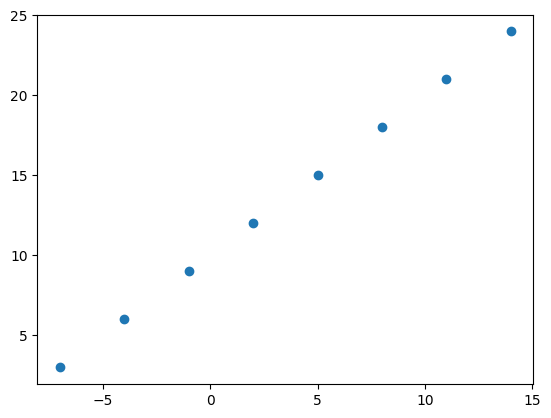

In [5]:
# Create features and labels
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize the data
plt.scatter(X, y)
plt.show()


In [6]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 471ms/step - loss: 16.4342 - mae: 16.4342
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 16.1530 - mae: 16.1530
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 15.8717 - mae: 15.8717
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 15.5905 - mae: 15.5905
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 15.3092 - mae: 15.3092
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 15.0280 - mae: 15.0280
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.8087 - mae: 14.8087
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.6762 - mae: 14.6762
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5437 - mae: 14.5437
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4112 - mae: 14.4112
Epoch 11/100
1/1 [==============================] 

In [7]:
# Load the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# One-hot encode the categorical columns
insurance_one_hot = pd.get_dummies(insurance)

# Split the data into train and test sets
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Create column transformer for normalization
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    # Since "sex", "smoker", and "region" columns are already one-hot encoded,
    # we don't need to apply OneHotEncoder on them again.
    # Instead, just pass them to MinMaxScaler for normalization (if needed).
    (MinMaxScaler(), ["sex_female", "sex_male", "smoker_no", "smoker_yes",
                      "region_northeast", "region_northwest", "region_southeast", "region_southwest"])
)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform the data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [12]:
# Set random seed
tf.random.set_seed(42)

# Build the model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train_normal, y_train, epochs=200, verbose=0)


In [13]:
# Evaluate the model on the test set
loss, mae = insurance_model.evaluate(X_test_normal, y_test)
print(f"Loss: {loss}, MAE: {mae}")


9/9 [==============================] - 0s 2ms/step - loss: 3178.5747 - mae: 3178.5747
Loss: 3178.57470703125, MAE: 3178.57470703125
